# Concerns:
- Todos:
    - Fix separators
    - CLTK
    - REDO ExtractDocumentContentFunction with lemmatization and stop word
- Paternalism (vs. more humanistic over time) actually go away from paternalism to more of a "God to Man" idea like up to down
    - Word Frequency:
        - Statistical testing?
        - In GRS, Muslim religious texts (how much of a Muslim clerics' text to classify as a Jihad or not)
        - First identifies with a baseline Jihad with similarity to Muslim clerics texts
    - Can compare each pope's documents to the documents of the First and Second Vatican Council
        - Are these pope's documents more similar to the First or Second Vatican council (using some ML)
        - Drift and backsliding
    - Focus/Validity:
        - Should not do (validity is not there because)
        - Documents of the first Vatican Council does not give insight into paternalism
        - Should instead focus on "the Catholic Church's conern with God or people"
- Time series:
    - "God" - "Human" Cosine similarity over document time
    - Frequency of words over time plot

In [1]:
### Packages ###
import os
import numpy as np
from scipy.spatial.distance import cosine

from utils.Main import *
from utils.Plots import *
from utils.Council import *
from utils.Encylicals import *

# WebScrape

In [2]:
## Save Encylicals ###
# SaveEnclylicals()

In [3]:
## Save Vatican Council Documents
# SaveVaticanDocuments("en")

# Load Text

In [4]:
RootDirectory = "/Users/simondn/Documents/CSSS594/TextAnalysisVatican/Data"
df_Encyclicals = LoadEncyclicals(os.path.join(RootDirectory, "Encylicals"))
df_Councils = LoadCouncils(os.path.join(RootDirectory, "Councils"))


In [5]:
df_Councils

,Council,Title,DocumentText
0,2,ad-gentes,DECREEAD GENTESON THE MISSION ACTIVITYOF THE C...
1,2,apostolicam-actuositatem,DECREE ON THE APOSTOLATE OF THE LAITYAPOSTOLIC...
2,2,christus-dominus,DECREE CONCERNINGTHE PASTORAL OFFICE OF BISHOP...
3,1,dei-filius,"The Orthodox Confession of the Eastern Church,..."
4,2,dei-verbum,1. Hearing the word of God with reverence and ...
5,2,dignitatis-humanae,AR-BE-CS-DE-EN-ES-FR-IT-HU-LA-LV-PT-SW-ZHDECLA...
6,2,gaudium-et-spes,PASTORAL CONSTITUTIONON THE CHURCH IN THEMODER...
7,2,gravissimum-educationis,DECLARATION ON CHRISTIAN EDUCATIONGRAVISSIMUM ...
8,2,inter-mirifica,DECREE ON THE MEDIA OF SOCIAL COMMUNICATIONSIN...
9,2,lumen-gentium,THE MYSTERY OF THE CHURCH\n\n2. The eternal Fa...


In [6]:
df_Encyclicals

,PopeName,encyclical,DocumentText,DocumentDate,PreVaticanII
0,leo_xiii,magni-nobis,Of great joy to us is your zealous regard for ...,1889-03-07,True
1,leo_xiii,vi-e-ben-noto,You know how We place amid present dangers Our...,1887-09-20,True
2,leo_xiii,diuturnum,The long-continued and most bitter war waged a...,1881-06-29,True
3,leo_xiii,supremi-apostolatus-officio,The supreme Apostolic office which we discharg...,1883-09-01,True
4,leo_xiii,inimica-vis,2. Our predecessors in the Roman pontificate h...,1892-12-08,True
...,...,...,...,...,...
210,pius_xii,redemptoris-nostri-cruciatus,"1. The passion of Our Redeemer, rendered prese...",1949-04-15,True
211,pius_xii,sempiternus-rex-christus,"1. Christ, the Eternal King, before he promise...",1951-09-08,True
212,pius_xii,sacra-virginitas,1. Holy virginity and that perfect chastity wh...,1954-03-25,True
213,pius_xii,le-pelerinage-de-lourdes,"2. We are particularly pleased, therefore, to ...",1957-07-02,True


# Word Frequency

In [7]:
### Stop Words ###
import nltk
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import STOPWORDS
nltk.download('stopwords')
nltk.download('punkt')
CustomStopWords = {"would", "which", "should", "shall", "thing"} 
StopWordsSet = set(stopwords.words("english")).union(STOPWORDS, CustomStopWords)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/simondn/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/simondn/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## All Popes

In [8]:
### Get word frequency per pope ###
EncylicalWordFrequency_ByPope = GetWordFrequency(df_input = df_Encyclicals, 
                                                  GroupByVar = "PopeName", 
                                                  StopWordsSet = StopWordsSet, 
                                                  TopNInput = 1000,
                                                  Normalize = True)

In [9]:
ChiSquaredTestResults_ByPope = ChiSquaredTestWordFrequency(EncylicalWordFrequency_ByPope, "francesco", "leo_xiii")["significant_words"]

## Popes before and after

In [10]:
### Get word frequency for popes before Vatican II and after Vatican II ###
EncylicalWordFrequency_ByBeforeAfter = GetWordFrequency(df_input = df_Encyclicals, 
                                                     GroupByVar = "PreVaticanII", 
                                                     StopWordsSet = StopWordsSet, 
                                                     TopNInput = 1000,
                                                     Normalize = True)
EncylicalWordFrequency_ByBeforeAfter.columns = ["Pre_VaticanII_Popes", "Post_VaticanII_Popes"]
EncylicalWordFrequency_ByBeforeAfter["Post_Minus_Pre"] = EncylicalWordFrequency_ByBeforeAfter["Post_VaticanII_Popes"] - EncylicalWordFrequency_ByBeforeAfter["Pre_VaticanII_Popes"]

In [11]:
ChiSquaredTestResults_ByBeforeAfter = ChiSquaredTestWordFrequency(EncylicalWordFrequency_ByBeforeAfter, "Pre_VaticanII_Popes", "Post_VaticanII_Popes")["significant_words"]

## Councils

In [12]:
### Get word frequency per Council ###
EncylicalWordFrequency_ByCouncil = GetWordFrequency(df_input = df_Councils, 
                                                  GroupByVar = "Council", 
                                                  StopWordsSet = StopWordsSet, 
                                                  TopNInput = 1000,
                                                  Normalize = True)
EncylicalWordFrequency_ByCouncil.columns = ["Vatican2", "Vatican1"]
EncylicalWordFrequency_ByCouncil = EncylicalWordFrequency_ByCouncil[["Vatican1", "Vatican2"]]
EncylicalWordFrequency_ByCouncil["Post_Minus_Pre"] = EncylicalWordFrequency_ByCouncil["Vatican2"] - EncylicalWordFrequency_ByCouncil["Vatican1"]

In [13]:
ChiSquaredTestResults_ByCouncil = ChiSquaredTestWordFrequency(EncylicalWordFrequency_ByCouncil, "Vatican1", "Vatican2")["significant_words"]

# Text Comparison

## Between Popes

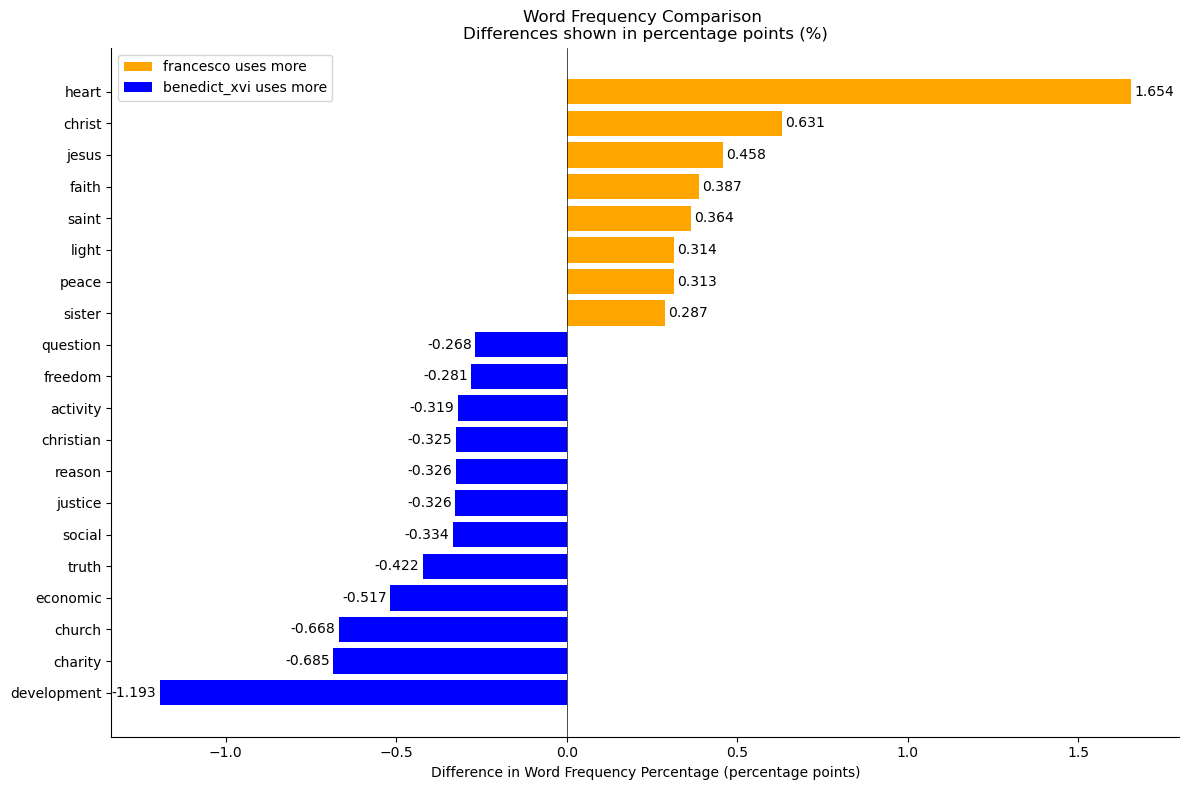

In [14]:
fig, ax = DivergingBarChartFunction(EncylicalWordFrequency_ByPope, "francesco", "benedict_xvi", NWords=20)


## Pre/Post Popes

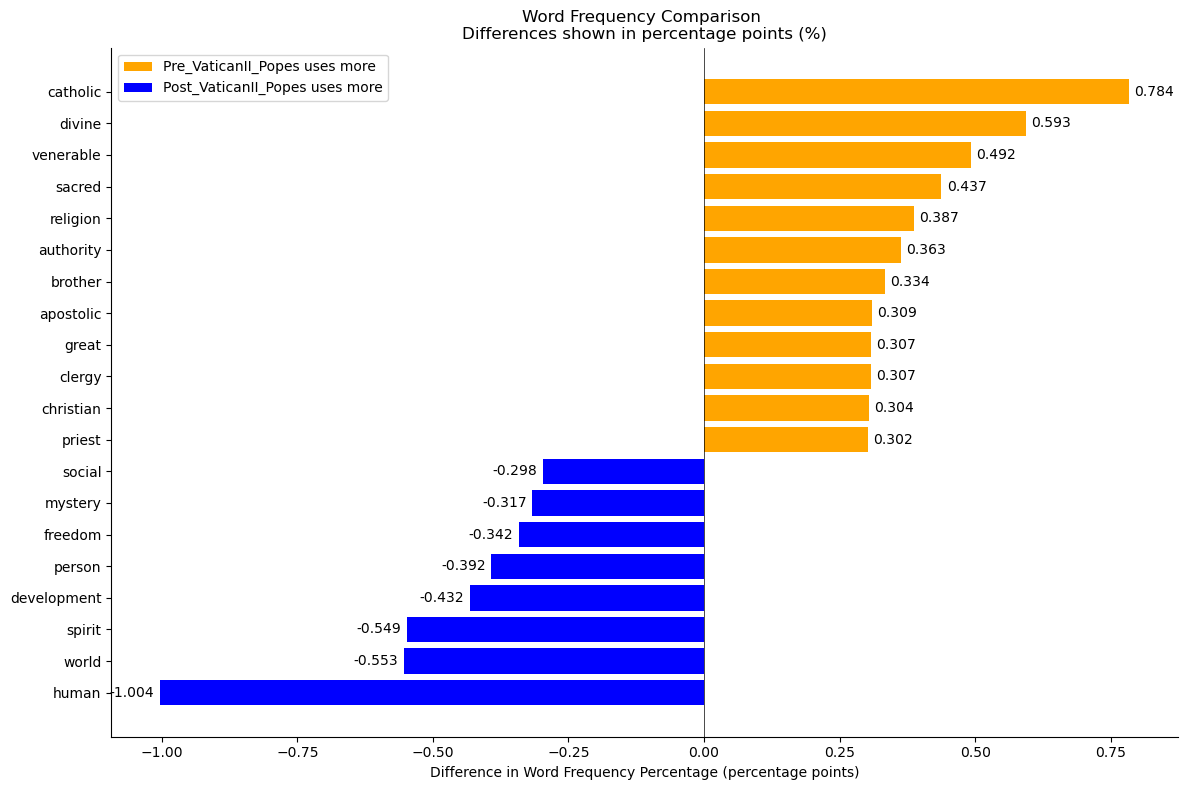

In [15]:
fig, ax = DivergingBarChartFunction(EncylicalWordFrequency_ByBeforeAfter, "Pre_VaticanII_Popes", "Post_VaticanII_Popes", NWords=20)

## By Council Documents

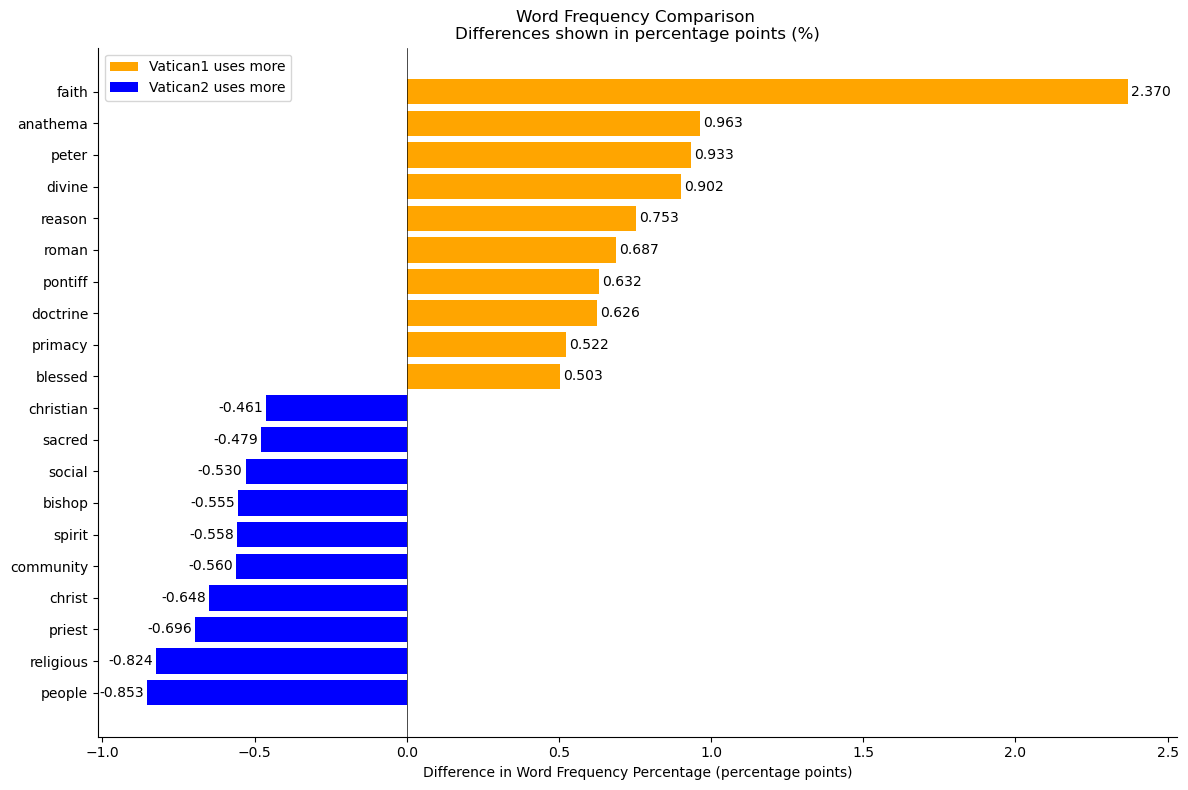

In [16]:
fig, ax = DivergingBarChartFunction(EncylicalWordFrequency_ByCouncil, "Vatican1", "Vatican2", NWords=20)


# Topic Modelling

## Pre/post Popes

In [17]:
# For Vatican II comparison
EncylicalPrePostPopes = AnalyzeVaticanIITopics(df_Encyclicals, NumTopics=5, stopwords=StopWordsSet)
EncylicalPrePostPopes_Comparison = CompareTopicResults(EncylicalPrePostPopes)
# EncylicalPrePostPopes_Comparison


In [18]:
### Topics ###
TopicColumns = [col for col in EncylicalPrePostPopes_Comparison.columns if 'Topics' in col]
EncylicalPrePostPopes_Comparison[TopicColumns]


,Pre-Vatican II_Topics,Post-Vatican II_Topics
0,"church, christ, faith, christian, divine, grea...","church, christ, spirit, faith, christian, jesu..."
1,"christ, church, divine, sacred, heart, jesus, ...","human, truth, world, church, people, social, r..."
2,"church, priest, catholic, faith, people, chris...","world, nation, human, faith, christ, progress,..."
3,"church, catholic, right, state, christian, soc...","church, christ, human, spirit, mother, faith, ..."
4,"faith, church, modernist, science, catholic, r...","people, missionary, human, mercy, world, socie..."


In [19]:
### Coherence Scores ###
CoherenceColumns = [col for col in EncylicalPrePostPopes_Comparison.columns if 'Coherence' in col]
EncylicalPrePostPopes_Comparison[CoherenceColumns]

,Pre-Vatican II_Coherence,Post-Vatican II_Coherence
0,0.296445,0.281359
1,0.296445,0.281359
2,0.296445,0.281359
3,0.296445,0.281359
4,0.296445,0.281359


## Between Popes

In [20]:
### For Vatican II comparison ###
PopeTopicModellingResults = AnalyzePapalTopics(df_Encyclicals, NumTopics=5, stopwords=StopWordsSet)
PopeTopicModellingResults_Comparison = CompareTopicResults(PopeTopicModellingResults)
# PopeTopicModellingResults_Comparison

In [21]:
### Topics ###
TopicColumns = [col for col in PopeTopicModellingResults_Comparison.columns if 'Topics' in col]
PopeTopicModellingResults_Comparison[TopicColumns]

,leo_xiii_Topics,john_paul_ii_Topics,benedict_xv_Topics,pius_x_Topics,john_xxiii_Topics,francesco_Topics,pius_xi_Topics,benedict_xvi_Topics,paul_vi_Topics,pius_xii_Topics
0,"prayer, rosary, church, mother, christ, devoti...","church, christ, spirit, human, people, christi...","church, christ, christian, order, charity, pea...","church, christ, brother, divine, faith, sacred...","prayer, rosary, october, mother, recite, human...","heart, christ, faith, jesus, saint, light, hum...","catholic, action, picture, church, motion, bro...","development, human, social, economic, truth, p...","nation, christ, church, human, world, developm...","christ, church, divine, heart, christian, jesu..."
1,"church, christ, christian, faith, catholic, gr...","human, right, worker, labour, social, mean, pr...","jerome, church, scripture, christ, bible, epis...","church, christ, faith, great, world, divine, w...","right, social, human, economic, state, authori...","heart, world, human, people, christ, faith, je...","priest, church, christ, divine, priesthood, gr...","human, world, church, development, charity, pe...","church, christ, world, dialogue, human, christ...","church, christ, catholic, divine, christian, b..."
2,"church, power, christ, christian, catholic, re...","human, moral, church, freedom, person, people,...","child, charity, little, christian, order, espe...","church, christ, catholic, divine, brother, aut...","church, christian, christ, priest, truth, cath...","human, faith, heart, world, society, people, p...","christ, francis, church, peace, order, great, ...","world, church, faith, christian, christ, human...","church, priest, christ, celibacy, priesthood, ...","sacred, church, christ, divine, sacrifice, chr..."
3,"church, christ, christian, power, catholic, di...","truth, faith, philosophy, human, reason, eucha...","child, christ, word, brother, charity, venerab...","catholic, association, teaching, church, princ...","social, human, church, christian, right, truth...","human, world, people, social, society, person,...","catholic, action, christian, church, christ, m...","human, social, development, truth, economic, c...","church, christ, world, nation, faith, human, p...","church, faith, catholic, christ, christian, mi..."
4,"church, catholic, faith, people, christian, gr...","church, human, christ, faith, people, truth, s...","christ, church, brother, preaching, human, ven...","church, faith, christ, catholic, brother, auth...","church, social, human, right, christian, chris...","christ, heart, human, world, faith, jesus, sai...","church, christ, right, christian, order, catho...","development, human, economic, social, people, ...","church, christ, nation, world, human, people, ...","missionary, native, people, church, number, ch..."


In [22]:
### Coherence Scores ###
CoherenceColumns = [col for col in PopeTopicModellingResults_Comparison.columns if 'Coherence' in col]
PopeTopicModellingResults_Comparison[CoherenceColumns]

,leo_xiii_Coherence,john_paul_ii_Coherence,benedict_xv_Coherence,pius_x_Coherence,john_xxiii_Coherence,francesco_Coherence,pius_xi_Coherence,benedict_xvi_Coherence,paul_vi_Coherence,pius_xii_Coherence
0,0.272795,0.317139,0.326105,0.24673,0.34919,0.280942,0.258744,0.251199,0.249123,0.298515
1,0.272795,0.317139,0.326105,0.24673,0.34919,0.280942,0.258744,0.251199,0.249123,0.298515
2,0.272795,0.317139,0.326105,0.24673,0.34919,0.280942,0.258744,0.251199,0.249123,0.298515
3,0.272795,0.317139,0.326105,0.24673,0.34919,0.280942,0.258744,0.251199,0.249123,0.298515
4,0.272795,0.317139,0.326105,0.24673,0.34919,0.280942,0.258744,0.251199,0.249123,0.298515


# Sentiment Analysis

In [23]:
EncyclicalSentimentsDF = GetEncylicalSentiments(df_Encyclicals)

In [24]:
EncyclicalSentimentsDF

,DocumentTitle,DocumentDate,PopeName,PreVaticanII,NegativeScore,NeutralScore,PositiveScore,CompoundScore
70,inscrutabili-dei-consilio,1878-04-21,leo_xiii,True,0.093,0.699,0.208,1.0000
34,quod-apostolici-muneris,1878-12-28,leo_xiii,True,0.102,0.706,0.192,0.9999
22,aeterni-patris,1879-08-04,leo_xiii,True,0.058,0.702,0.240,1.0000
49,arcanum,1880-02-10,leo_xiii,True,0.076,0.759,0.165,1.0000
16,grande-munus,1880-09-30,leo_xiii,True,0.042,0.751,0.207,1.0000
...,...,...,...,...,...,...,...,...
166,caritas-in-veritate,2009-06-29,benedict_xvi,False,0.066,0.742,0.193,1.0000
139,lumen-fidei,2013-06-29,francesco,False,0.029,0.723,0.248,1.0000
137,laudato-si,2015-05-24,francesco,False,0.084,0.729,0.187,1.0000
138,fratelli-tutti,2020-10-03,francesco,False,0.119,0.688,0.193,1.0000


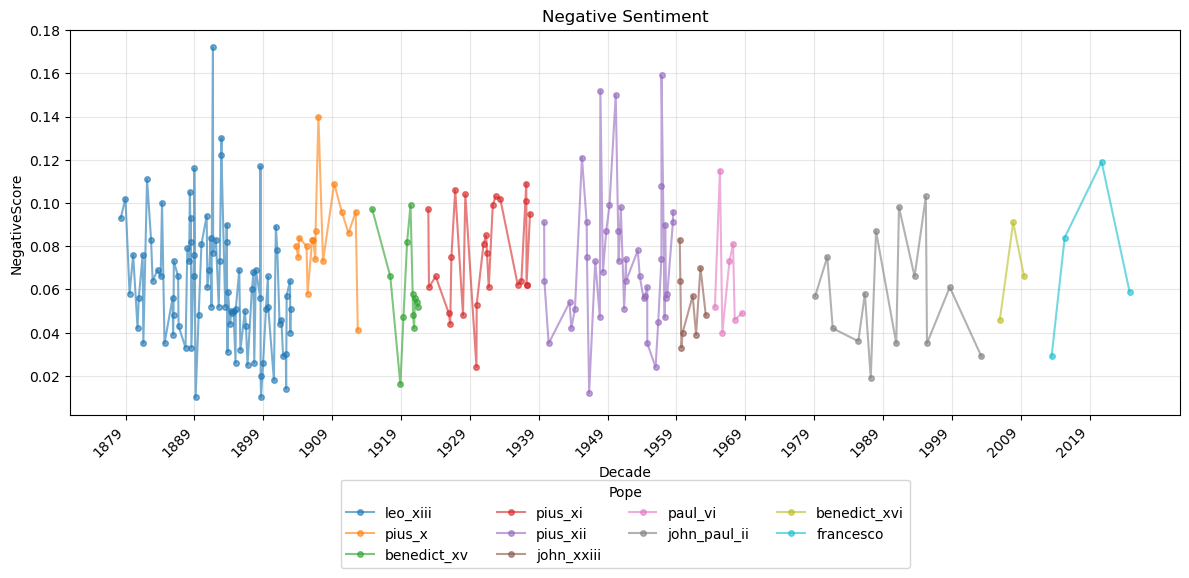

In [25]:
PlotSentimentScores(EncyclicalSentimentsDF, "NegativeScore")

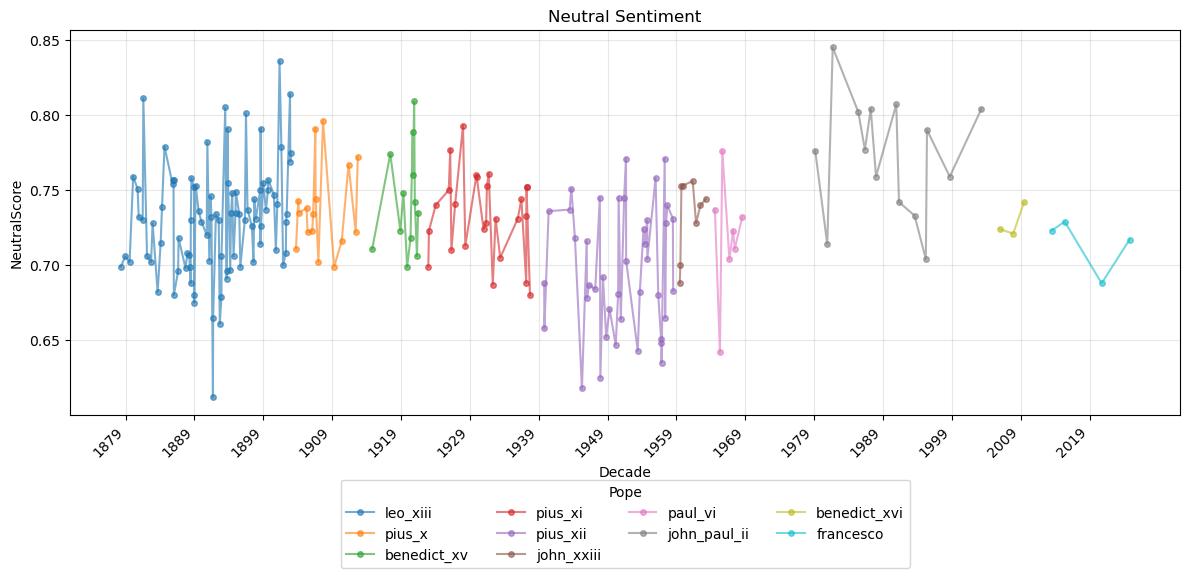

In [26]:
PlotSentimentScores(EncyclicalSentimentsDF, "NeutralScore")

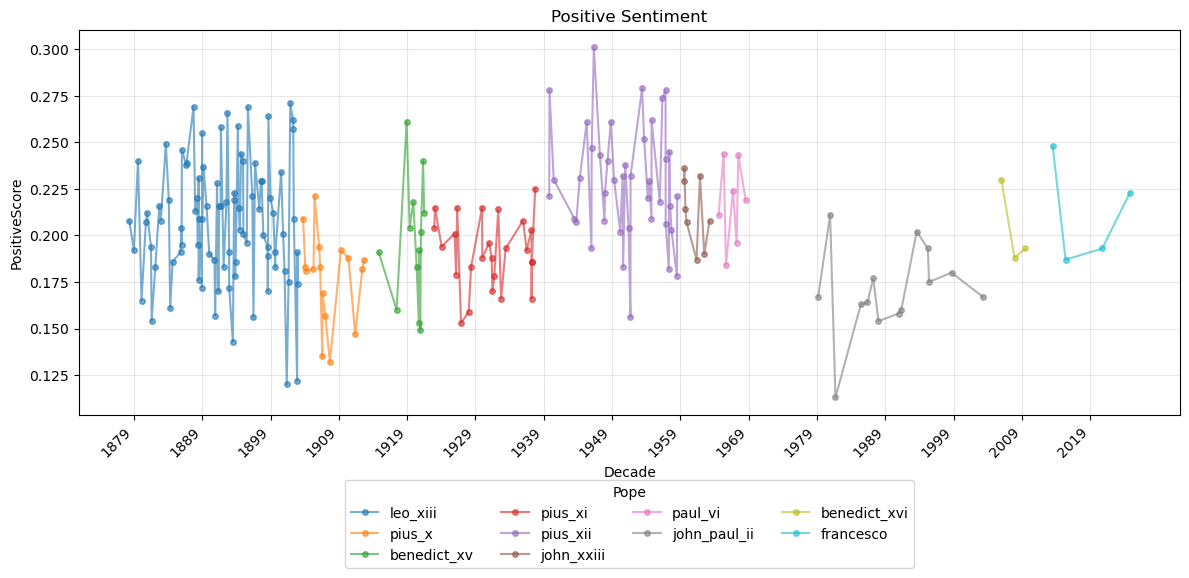

In [27]:
PlotSentimentScores(EncyclicalSentimentsDF, "PositiveScore")

# Comparison to Vatican Council Documents

In [28]:
### For now ###
# df_Councils["Council"] = list(np.array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])+1)

### Run the analysis ###
DocumentSimilarity, PopeSimilarity = AnalyzeDocumentSimilarities(df_Councils, df_Encyclicals)


In [29]:
DocumentSimilarity[DocumentSimilarity["Vatican1_Similarity"] > DocumentSimilarity["Vatican2_Similarity"]]

,PopeName,encyclical,Vatican1_Similarity,Vatican2_Similarity,DocumentDate
69,leo_xiii,satis-cognitum,0.380876,0.315306,1896-06-29


In [30]:
PopeSimilarity["Post_Minus_Pre"] = PopeSimilarity["Vatican2_Similarity"] - PopeSimilarity["Vatican1_Similarity"]

In [31]:
PopeSimilarity.sort_values("Post_Minus_Pre")[["PopeName", "Post_Minus_Pre"]]

,PopeName,Post_Minus_Pre
0,benedict_xv,0.051946
5,leo_xiii,0.054412
7,pius_x,0.062027
9,pius_xii,0.084390
8,pius_xi,0.098817
4,john_xxiii,0.156664
2,francesco,0.170651
6,paul_vi,0.177902
1,benedict_xvi,0.195132
3,john_paul_ii,0.208316


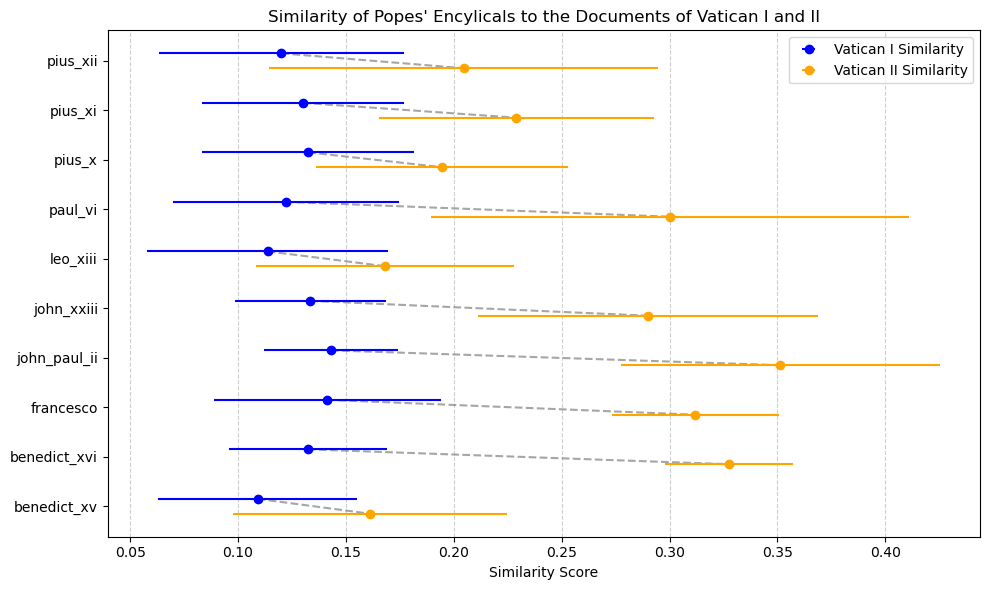

In [32]:
PlotCouncilEncyclicalSimilarityScore(PopeSimilarity)

# Proximity Analysis

In [33]:
def analyze_divine_human_proximity(df_Encyclicals, interval_years=15, min_docs=5, concepts1=None, concepts2=None):
    """
    Analyze the proximity between divine and human concepts in papal encyclicals.
    
    Parameters:
    df_Encyclicals (DataFrame): DataFrame containing papal encyclicals
    interval_years (int): Size of time intervals in years (e.g., 5, 10, 15, 20)
    min_docs (int): Minimum number of documents required for a time period
    concepts1 (list): First set of concept terms (default: divine terms)
    concepts2 (list): Second set of concept terms (default: human terms)
    
    Returns:
    tuple: (results_df, matplotlib figure)
    """
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches
    import re
    from nltk.corpus import stopwords
    import nltk

    # Make sure we have stopwords
    try:
        stopwords.words('english')
    except:
        nltk.download('stopwords')

    # Default concepts if not provided
    if concepts1 is None:
        concepts1 = ["god", "divine", "lord", "creator", "almighty"]
    if concepts2 is None:
        concepts2 = ["man", "human", "person", "mankind", "humanity", "people"]

    # Prepare DataFrame
    df = df_Encyclicals.copy()
    df['DocumentDate'] = pd.to_datetime(df['DocumentDate'])
    df['Year'] = df['DocumentDate'].dt.year
    
    # Generate time periods
    min_year = df['Year'].min()
    max_year = df['Year'].max()
    
    # Adjust min_year to start at a clean interval
    start_year = min_year - (min_year % interval_years)
    if start_year < min_year:
        start_year += interval_years
        
    time_periods = []
    current_year = start_year
    while current_year < max_year:
        end_year = min(current_year + interval_years - 1, max_year)
        time_periods.append((current_year, end_year))
        current_year = end_year + 1

    # Preprocess text function
    def preprocess_text(text):
        if not isinstance(text, str) or pd.isna(text):
            return []
        
        # Convert to lowercase
        text = text.lower()
        
        # Tokenize - simple word extraction
        words = re.findall(r'\b[a-z]+\b', text)
        
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        words = [w for w in words if w not in stop_words and len(w) > 2]
        
        return words

    # Store results
    results = []

    # Calculate co-occurrence distance for each time period
    for start_year, end_year in time_periods:
        # Filter documents
        period_docs = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)]
        
        if len(period_docs) < min_docs:
            print(f"Skipping period {start_year}-{end_year}: insufficient documents ({len(period_docs)} found, minimum {min_docs} required)")
            continue
        
        # Process each document
        proximity_scores = []
        for doc in period_docs['DocumentText']:
            words = preprocess_text(doc)
            
            # Find positions of concept terms
            concept1_positions = [i for i, word in enumerate(words) if word in concepts1]
            concept2_positions = [i for i, word in enumerate(words) if word in concepts2]
            
            # Skip if either concept is missing
            if not concept1_positions or not concept2_positions:
                continue
                
            # Calculate minimum distance between concepts in this document
            min_distance = float('inf')
            for pos1 in concept1_positions:
                for pos2 in concept2_positions:
                    distance = abs(pos1 - pos2)
                    if distance < min_distance:
                        min_distance = distance
            
            # Calculate proximity score (inverse of distance)
            if min_distance < float('inf'):
                proximity = 1.0 / (min_distance + 1)  # Add 1 to avoid division by zero
                proximity_scores.append(proximity)
        
        # Skip periods with no proximity scores
        if not proximity_scores:
            print(f"Skipping period {start_year}-{end_year}: no proximity scores found")
            continue
            
        # Calculate mean and confidence interval
        mean_proximity = np.mean(proximity_scores)
        
        # Bootstrap for confidence interval
        n_bootstrap = 1000
        bootstrap_means = []
        for _ in range(n_bootstrap):
            bootstrap_sample = np.random.choice(proximity_scores, 
                                             size=len(proximity_scores), 
                                             replace=True)
            bootstrap_means.append(np.mean(bootstrap_sample))
        
        ci_low = np.percentile(bootstrap_means, 2.5)
        ci_high = np.percentile(bootstrap_means, 97.5)
        
        results.append({
            'StartYear': start_year,
            'EndYear': end_year,
            'Proximity': mean_proximity,
            'CI_Low': ci_low,
            'CI_High': ci_high,
            'NumDocs': len(period_docs),
            'ScoredDocs': len(proximity_scores)
        })

    # Convert to DataFrame
    results_df = pd.DataFrame(results)
    
    # Return empty results if nothing found
    if len(results_df) == 0:
        print("No valid time periods found. Try reducing min_docs or increasing interval_years.")
        return results_df, None

    # Create figure with a single plot
    fig, ax = plt.subplots(figsize=(20, 8))

    # Main plot with error bars
    ax.errorbar(
        x=results_df['StartYear'] + (results_df['EndYear'] - results_df['StartYear']) / 2,
        y=results_df['Proximity'],
        yerr=[results_df['Proximity'] - results_df['CI_Low'], 
              results_df['CI_High'] - results_df['Proximity']],
        fmt='o-',
        capsize=5,
        capthick=1.5,
        elinewidth=1.5,
        markersize=8
    )

    # Add Vatican II line to plot
    ax.axvline(x=1962, color='r', linestyle='--', alpha=0.7, label='Vatican II Begins (1962)')

    # Set plot properties 
    ax.set_ylabel('God-Human Proximity Score', fontsize=14)
    ax.set_xlabel('Time Period', fontsize=14)
    
    concept1_str = ", ".join([f"'{c}'" for c in concepts1])
    concept2_str = ", ".join([f"'{c}'" for c in concepts2])
    ax.set_title(f'Proximity in Papal Encyclicals\nEvolution Over Time (with 95% confidence interval)', fontsize=16)

    # Set x-axis ticks
    x_ticks = results_df['StartYear'] + (results_df['EndYear'] - results_df['StartYear']) / 2
    ax.set_xticks(x_ticks)
    ax.set_xticklabels([f"{start}-\n{end}" for start, end in zip(results_df['StartYear'], results_df['EndYear'])], 
                       rotation=0)

    # Add grid lines
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(loc='best')
    
    # Define papal reigns
    pope_reigns = [
        ("Leo XIII", 1878, 1903, "tab:red"),
        ("Pius X", 1903, 1914, "tab:green"),
        ("Benedict XV", 1914, 1922, "tab:blue"),
        ("Pius XI", 1922, 1939, "tab:purple"),
        ("Pius XII", 1939, 1958, "tab:orange"),
        ("John XXIII", 1958, 1963, "tab:brown"),
        ("Paul VI", 1963, 1978, "tab:pink"),
        ("John Paul I", 1978, 1978, "tab:gray"),  # Very short reign
        ("John Paul II", 1978, 2005, "tab:cyan"),
        ("Benedict XVI", 2005, 2013, "tab:olive"),
        ("Francis", 2013, 2024, "tab:blue")
    ]
    
    # Add pope reign color bars directly on x-axis
    bar_height = 0.015  # Height of the colored bars on x-axis (in axis coordinates)
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    
    # Calculate position for pope bars (at the bottom of the plot)
    for pope, start, end, color in pope_reigns:
        # Skip drawing if outside the plot range
        if end < min(results_df['StartYear']) or start > max(results_df['EndYear']):
            continue
            
        # Add colored bar at bottom of plot
        rect = mpatches.Rectangle(
            (start, y_min), 
            end - start, 
            (y_max - y_min) * bar_height,  # Convert to data coordinates
            edgecolor='black', 
            facecolor=color, 
            alpha=0.8,
            transform=ax.transData,
            clip_on=False,
            zorder=100  # Make sure it's drawn on top
        )
        ax.add_patch(rect)
        
        # Add pope name above the color bar (just above the x-axis)
        ax.text(
            start + (end - start)/2,  # Center of pope's reign 
            y_min + (y_max - y_min) * 0.03,  # Position just above the x-axis
            pope,
            ha='center', 
            va='bottom', 
            fontsize=9,
            fontweight='bold',
            bbox=dict(facecolor='white', alpha=0.8, pad=0.2, boxstyle='round', edgecolor='gray'),
            transform=ax.transData,
            zorder=101  # Above the color bar
        )
    
    # Adjust bottom margin to make room for concepts text
    plt.subplots_adjust(bottom=0.15)
    
    # Add concepts as text at the bottom of the figure
    concepts_text = f"Divine Concepts: [{concept1_str}] | Human Concepts: [{concept2_str}]"
    fig.text(0.5, 0.02, concepts_text, ha='center', fontsize=11, 
             bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5', 
                       edgecolor='gray', linewidth=1))
    
    # Print summary
    print("\nSummary of results:")
    print(results_df[['StartYear', 'EndYear', 'Proximity', 'NumDocs', 'ScoredDocs']])
    print(f"\nAnalysis used {interval_years}-year intervals with minimum {min_docs} documents per period")
    
    # Return all three expected values for backward compatibility
    return results_df, fig, None


Summary of results:
    StartYear  EndYear  Proximity  NumDocs  ScoredDocs
0        1880     1889   0.272922       30          29
1        1890     1899   0.335305       41          41
2        1900     1909   0.327941       24          21
3        1910     1919   0.225214        9           9
4        1920     1929   0.302813       18          18
5        1930     1939   0.366667       16          16
6        1940     1949   0.250555       14          14
7        1950     1959   0.366303       28          28
8        1960     1969   0.457576       11          11
9        1970     1979   0.500000        1           1
10       1980     1989   0.500000        6           6
11       1990     1999   0.500000        6           6
12       2000     2009   0.500000        4           4
13       2010     2019   0.500000        2           2
14       2020     2024   0.500000        2           2

Analysis used 10-year intervals with minimum 1 documents per period


/var/folders/10/2lfzfs1j0j933_mjkrskp5kh0000gq/T/ipykernel_33571/1984426228.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  main_fig.show()


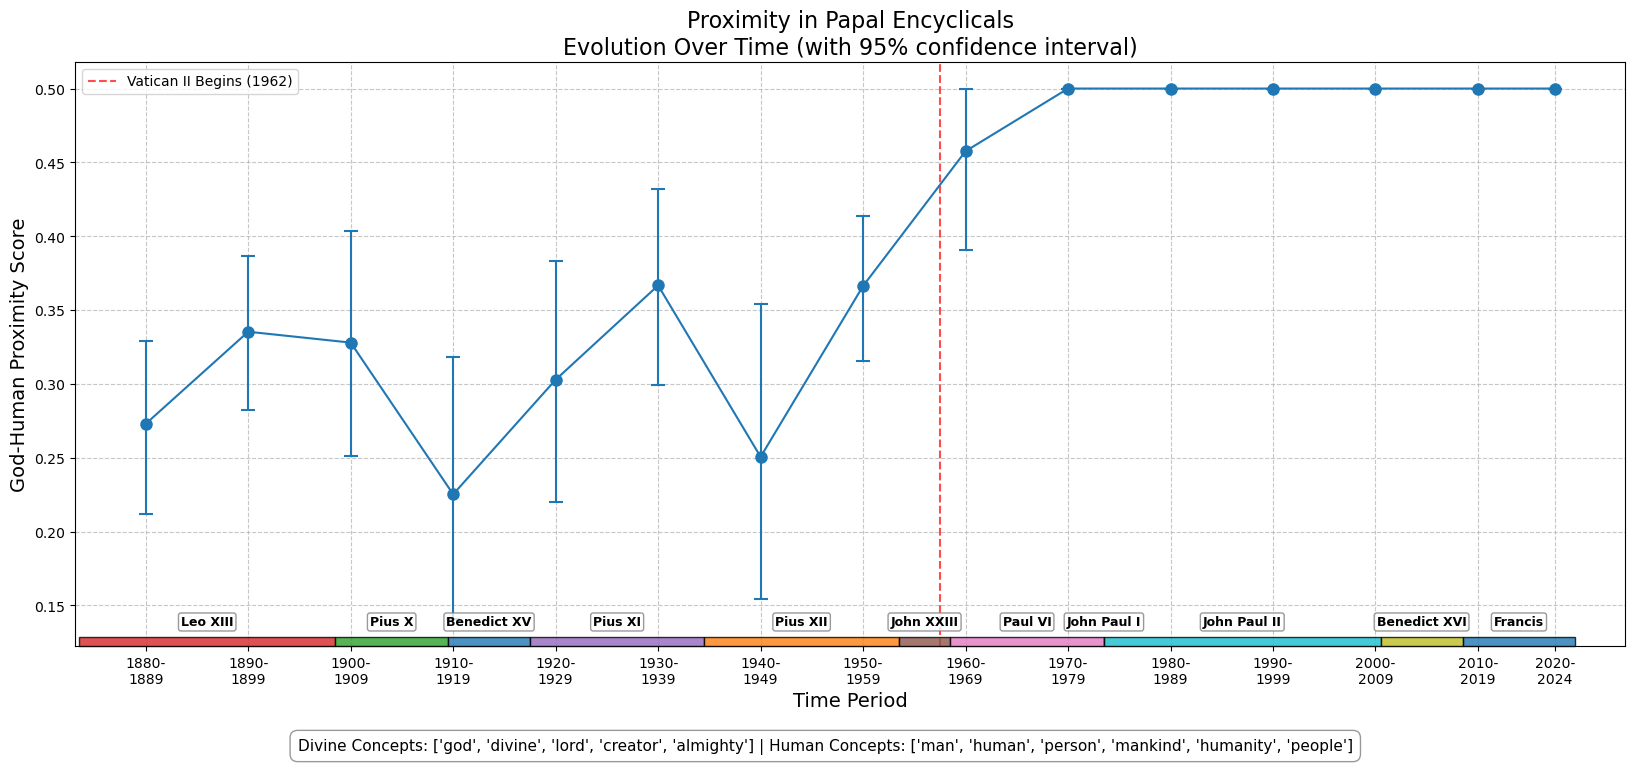

In [34]:
results, main_fig, legend_fig = analyze_divine_human_proximity(df_Encyclicals, interval_years=10, min_docs=1)
main_fig.show()


Summary of results:
    StartYear  EndYear  Proximity  NumDocs  ScoredDocs
0        1880     1889   0.286138       30          25
1        1890     1899   0.274859       41          38
2        1900     1909   0.317024       24          16
3        1910     1919   0.273186        9           7
4        1920     1929   0.424510       18          17
5        1930     1939   0.477778       16          15
6        1940     1949   0.309491       14          12
7        1950     1959   0.355554       28          27
8        1960     1969   0.462121       11          11
9        1970     1979   0.500000        1           1
10       1980     1989   0.500000        6           6
11       1990     1999   0.500000        6           6
12       2000     2009   0.500000        4           4
13       2010     2019   0.416667        2           2
14       2020     2024   0.500000        2           2

Analysis used 10-year intervals with minimum 1 documents per period


/var/folders/10/2lfzfs1j0j933_mjkrskp5kh0000gq/T/ipykernel_33571/1519597966.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  main_fig.show()


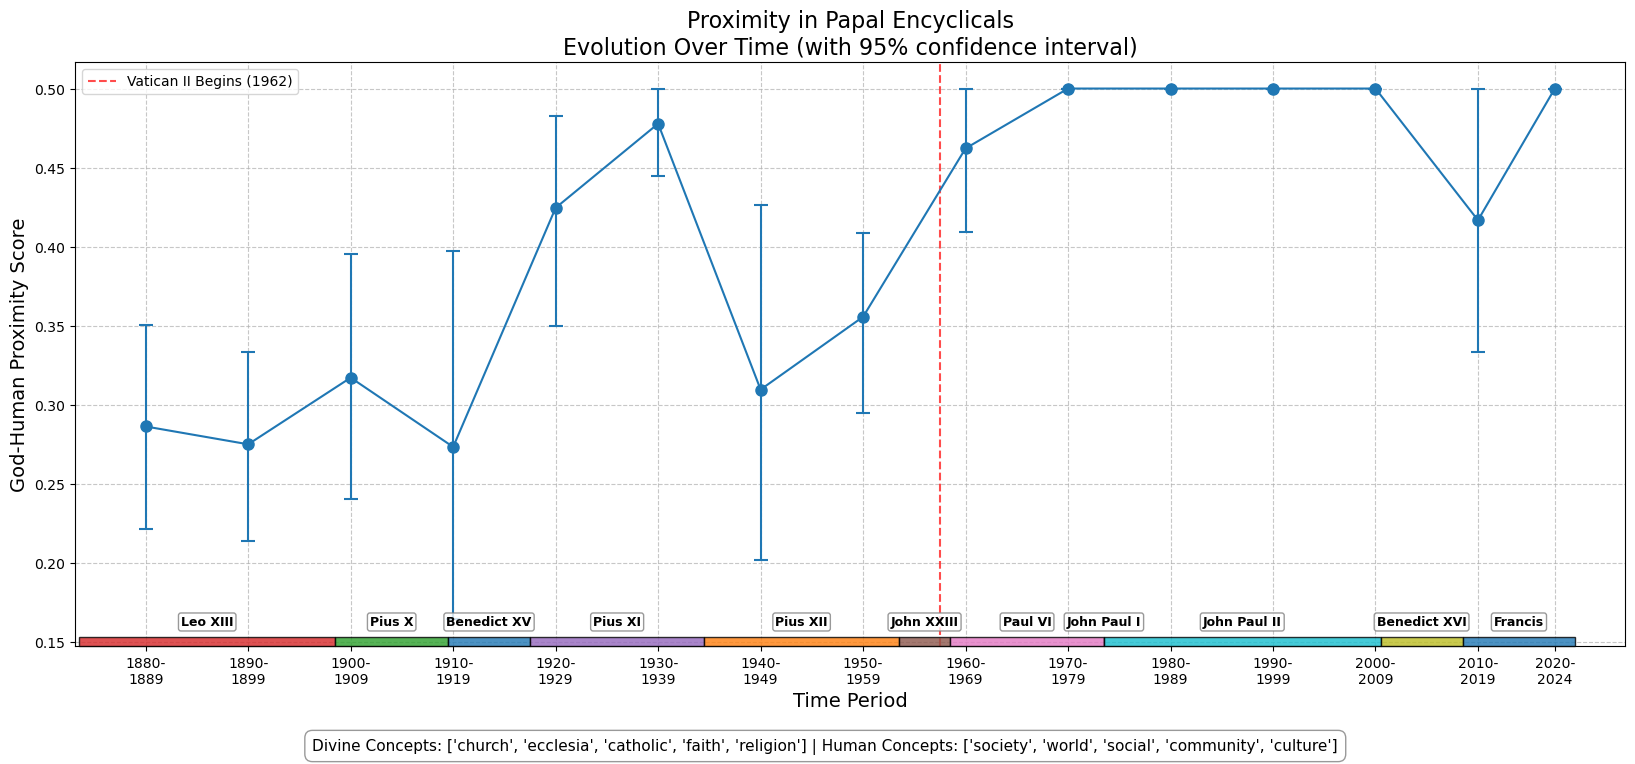

In [35]:
# Analyze church-society relationship
church_terms = ["church", "ecclesia", "catholic", "faith", "religion"]
society_terms = ["society", "world", "social", "community", "culture"]

results, main_fig, legend_fig = analyze_divine_human_proximity(df_Encyclicals, 
                                                               interval_years=10, 
                                                               min_docs=1, 
                                                               concepts1=church_terms,
                                                               concepts2=society_terms)
main_fig.show()

# Cosine Analysis

In [42]:
def analyze_divine_human_proximity(df_Encyclicals, interval_years=15, min_docs=2, concepts1=None, concepts2=None):
    """
    Analyze the proximity between divine and human concepts in papal encyclicals using cosine similarity.
    
    Parameters:
    df_Encyclicals (DataFrame): DataFrame containing papal encyclicals
    interval_years (int): Size of time intervals in years (e.g., 5, 10, 15, 20)
    min_docs (int): Minimum number of documents required for a time period
    concepts1 (list): First set of concept terms (default: divine terms)
    concepts2 (list): Second set of concept terms (default: human terms)
    
    Returns:
    tuple: (results_df, matplotlib figure, None)
    """
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches
    import re
    from nltk.corpus import stopwords
    import nltk
    from collections import Counter
    from sklearn.metrics.pairwise import cosine_similarity
    from scipy.sparse import csr_matrix

    # Make sure we have stopwords
    try:
        stopwords.words('english')
    except:
        nltk.download('stopwords')

    # Default concepts if not provided
    if concepts1 is None:
        concepts1 = ["god", "divine", "lord", "creator", "almighty"]
    if concepts2 is None:
        concepts2 = ["man", "human", "person", "mankind", "humanity", "people"]
        
    # Make sure all concepts are lowercase
    concepts1 = [c.lower() for c in concepts1]
    concepts2 = [c.lower() for c in concepts2]
    
    print(f"Analyzing with divine concepts: {concepts1}")
    print(f"Analyzing with human concepts: {concepts2}")

    # Prepare DataFrame
    df = df_Encyclicals.copy()
    df['DocumentDate'] = pd.to_datetime(df['DocumentDate'])
    df['Year'] = df['DocumentDate'].dt.year
    
    # Generate time periods
    min_year = df['Year'].min()
    max_year = df['Year'].max()
    
    # Adjust min_year to start at a clean interval
    start_year = min_year - (min_year % interval_years)
    if start_year < min_year:
        start_year += interval_years
        
    time_periods = []
    current_year = start_year
    while current_year < max_year:
        end_year = min(current_year + interval_years - 1, max_year)
        time_periods.append((current_year, end_year))
        current_year = end_year + 1

    # Preprocess text function
    def preprocess_text(text):
        if not isinstance(text, str) or pd.isna(text):
            return []
        
        # Convert to lowercase
        text = text.lower()
        
        # Tokenize - simple word extraction
        words = re.findall(r'\b[a-z]+\b', text)
        
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        words = [w for w in words if w not in stop_words and len(w) > 2]
        
        return words

    # Function to calculate cosine similarity between concept groups
    def calculate_context_vectors(words, concept1_terms, concept2_terms, window_size=100):
        """
        Calculate context vectors for concept terms in a document
        
        Parameters:
        words (list): List of words in the document
        concept1_terms (list): First set of concept terms
        concept2_terms (list): Second set of concept terms
        window_size (int): Context window size
        
        Returns:
        tuple: (concept1_context_vector, concept2_context_vector)
        """
        if not words:
            return None, None
        
        # Find all occurrences of concept terms
        concept1_occurrences = [word for word in words if word in concept1_terms]
        concept2_occurrences = [word for word in words if word in concept2_terms]
        
        # If either concept is not present, return None
        if not concept1_occurrences or not concept2_occurrences:
            return None, None
        
        # Get whole document vocabulary
        vocabulary = sorted(set(words))
        word_to_idx = {word: i for i, word in enumerate(vocabulary)}
        
        # Initialize context vectors for each concept
        concept1_context = np.zeros(len(vocabulary))
        concept2_context = np.zeros(len(vocabulary))
        
        # Build context vectors by looking at words around concept terms
        for i, word in enumerate(words):
            # For concept1 terms, add surrounding context to concept1_context
            if word in concept1_terms:
                window_start = max(0, i - window_size)
                window_end = min(len(words), i + window_size + 1)
                
                for context_pos in range(window_start, window_end):
                    if context_pos != i:  # Skip the concept term itself
                        context_word = words[context_pos]
                        concept1_context[word_to_idx[context_word]] += 1
            
            # For concept2 terms, add surrounding context to concept2_context
            if word in concept2_terms:
                window_start = max(0, i - window_size)
                window_end = min(len(words), i + window_size + 1)
                
                for context_pos in range(window_start, window_end):
                    if context_pos != i:  # Skip the concept term itself
                        context_word = words[context_pos]
                        concept2_context[word_to_idx[context_word]] += 1
        
        return concept1_context, concept2_context

    # Function to calculate cosine similarity between concept contexts
    def calculate_cosine_similarity(words, concept1_terms, concept2_terms):
        """
        Calculate cosine similarity between contexts of different concept groups
        
        Parameters:
        words (list): List of words in the document
        concept1_terms (list): First set of concept terms
        concept2_terms (list): Second set of concept terms
        
        Returns:
        float: Cosine similarity between concept contexts
        """
        # Get context vectors
        concept1_context, concept2_context = calculate_context_vectors(
            words, concept1_terms, concept2_terms
        )
        
        # If either context is empty, return 0 similarity
        if concept1_context is None or concept2_context is None:
            return 0.0
        
        # If either vector is all zeros, return 0 similarity
        if not np.any(concept1_context) or not np.any(concept2_context):
            return 0.0
        
        # Calculate cosine similarity
        similarity = cosine_similarity(
            csr_matrix(concept1_context.reshape(1, -1)),
            csr_matrix(concept2_context.reshape(1, -1))
        )[0][0]
        
        return similarity

    # Store results
    results = []

    # Calculate co-occurrence and semantic similarity for each time period
    for start_year, end_year in time_periods:
        # Filter documents
        period_docs = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)]
        
        if len(period_docs) < min_docs:
            print(f"Skipping period {start_year}-{end_year}: insufficient documents ({len(period_docs)} found, minimum {min_docs} required)")
            continue
        
        # Process each document
        similarity_scores = []
        for doc in period_docs['DocumentText']:
            words = preprocess_text(doc)
            
            # Check if any concept terms exist in the document
            has_concept1 = any(word in concepts1 for word in words)
            has_concept2 = any(word in concepts2 for word in words)
            
            # Skip documents without both concept types
            if not has_concept1 or not has_concept2:
                continue
            
            # Calculate semantic similarity using cosine distance
            similarity = calculate_cosine_similarity(words, concepts1, concepts2)
            if similarity > 0:  # Only include documents with some similarity
                similarity_scores.append(similarity)
        
        # Skip periods with no similarity scores
        if not similarity_scores:
            print(f"Skipping period {start_year}-{end_year}: no similarity scores found (tried {len(period_docs)} documents)")
            continue
            
        # Calculate mean and confidence interval
        mean_similarity = np.mean(similarity_scores)
        
        # Bootstrap for confidence interval
        n_bootstrap = 1000
        bootstrap_means = []
        for _ in range(n_bootstrap):
            bootstrap_sample = np.random.choice(similarity_scores, 
                                             size=len(similarity_scores), 
                                             replace=True)
            bootstrap_means.append(np.mean(bootstrap_sample))
        
        ci_low = np.percentile(bootstrap_means, 2.5)
        ci_high = np.percentile(bootstrap_means, 97.5)
        
        results.append({
            'StartYear': start_year,
            'EndYear': end_year,
            'Proximity': mean_similarity,  # Now this is cosine similarity
            'CI_Low': ci_low,
            'CI_High': ci_high,
            'NumDocs': len(period_docs),
            'ScoredDocs': len(similarity_scores)
        })

    # Convert to DataFrame
    results_df = pd.DataFrame(results)
    
    # Return empty results if nothing found
    if len(results_df) == 0:
        print("No valid time periods found. Try reducing min_docs or increasing interval_years.")
        return results_df, None, None

    # Create figure with a single plot
    fig, ax = plt.subplots(figsize=(12, 8))

    # Main plot with error bars
    ax.errorbar(
        x=results_df['StartYear'] + (results_df['EndYear'] - results_df['StartYear']) / 2,
        y=results_df['Proximity'],
        yerr=[results_df['Proximity'] - results_df['CI_Low'], 
              results_df['CI_High'] - results_df['Proximity']],
        fmt='o-',
        capsize=5,
        capthick=1.5,
        elinewidth=1.5,
        markersize=8
    )

    # Add Vatican II line to plot
    ax.axvline(x=1962, color='r', linestyle='--', alpha=0.7, label='Vatican II Begins (1962)')

    # Set plot properties 
    ax.set_ylabel('God-Human Cosine Similarity', fontsize=14)  # Updated y-axis label
    ax.set_xlabel('Time Period', fontsize=14)
    
    concept1_str = ", ".join([f"'{c}'" for c in concepts1])
    concept2_str = ", ".join([f"'{c}'" for c in concepts2])
    ax.set_title(f'Proximity in Papal Encyclicals\nEvolution Over Time (with 95% confidence interval)', fontsize=16)

    # Set x-axis ticks
    x_ticks = results_df['StartYear'] + (results_df['EndYear'] - results_df['StartYear']) / 2
    ax.set_xticks(x_ticks)
    ax.set_xticklabels([f"{start}-\n{end}" for start, end in zip(results_df['StartYear'], results_df['EndYear'])], 
                       rotation=0)

    # Add grid lines
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(loc='best')
    
    # Define papal reigns
    pope_reigns = [
        ("Leo XIII", 1878, 1903, "tab:red"),
        ("Pius X", 1903, 1914, "tab:green"),
        ("Benedict XV", 1914, 1922, "tab:blue"),
        ("Pius XI", 1922, 1939, "tab:purple"),
        ("Pius XII", 1939, 1958, "tab:orange"),
        ("John XXIII", 1958, 1963, "tab:brown"),
        ("Paul VI", 1963, 1978, "tab:pink"),
        ("John Paul I", 1978, 1978, "tab:gray"),  # Very short reign
        ("John Paul II", 1978, 2005, "tab:cyan"),
        ("Benedict XVI", 2005, 2013, "tab:olive"),
        ("Francis", 2013, 2024, "tab:blue")
    ]
    
    # Add pope reign color bars directly on x-axis
    bar_height = 0.015  # Height of the colored bars on x-axis (in axis coordinates)
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    
    # Calculate position for pope bars (at the bottom of the plot)
    for pope, start, end, color in pope_reigns:
        # Skip drawing if outside the plot range
        if end < min(results_df['StartYear']) or start > max(results_df['EndYear']):
            continue
            
        # Add colored bar at bottom of plot
        rect = mpatches.Rectangle(
            (start, y_min), 
            end - start, 
            (y_max - y_min) * bar_height,  # Convert to data coordinates
            edgecolor='black', 
            facecolor=color, 
            alpha=0.8,
            transform=ax.transData,
            clip_on=False,
            zorder=100  # Make sure it's drawn on top
        )
        ax.add_patch(rect)
        
        # Add pope name above the color bar (just above the x-axis)
        ax.text(
            start + (end - start)/2,  # Center of pope's reign 
            y_min + (y_max - y_min) * 0.03,  # Position just above the x-axis
            pope,
            ha='center', 
            va='bottom', 
            fontsize=9,
            fontweight='bold',
            bbox=dict(facecolor='white', alpha=0.8, pad=0.2, boxstyle='round', edgecolor='gray'),
            transform=ax.transData,
            zorder=101  # Above the color bar
        )
    
    # Adjust bottom margin to make room for concepts text
    plt.subplots_adjust(bottom=0.15)
    
    # Add concepts as text at the bottom of the figure
    concepts_text = f"Divine Concepts: [{concept1_str}] | Human Concepts: [{concept2_str}]"
    fig.text(0.5, 0.02, concepts_text, ha='center', fontsize=11, 
             bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5', 
                       edgecolor='gray', linewidth=1))
    
    # Print summary
    print("\nSummary of results:")
    print(results_df[['StartYear', 'EndYear', 'Proximity', 'NumDocs', 'ScoredDocs']])
    print(f"\nAnalysis used {interval_years}-year intervals with minimum {min_docs} documents per period")
    print(f"Analysis used cosine similarity for measuring concept proximity")
    
    # Return all three expected values for backward compatibility
    return results_df, fig, None

Analyzing with divine concepts: ['god', 'divine', 'lord', 'creator', 'almighty']
Analyzing with human concepts: ['man', 'human', 'person', 'mankind', 'humanity', 'people']

Summary of results:
    StartYear  EndYear  Proximity  NumDocs  ScoredDocs
0        1880     1889   0.817198       30          29
1        1890     1899   0.847983       41          41
2        1900     1909   0.874501       24          21
3        1910     1919   0.898291        9           9
4        1920     1929   0.860461       18          18
5        1930     1939   0.875895       16          16
6        1940     1949   0.802590       14          14
7        1950     1959   0.866855       28          28
8        1960     1969   0.918525       11          11
9        1970     1979   0.929890        1           1
10       1980     1989   0.939884        6           6
11       1990     1999   0.950300        6           6
12       2000     2009   0.911443        4           4
13       2010     2019   0.884533    

/var/folders/10/2lfzfs1j0j933_mjkrskp5kh0000gq/T/ipykernel_33571/618993786.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  main_fig.show()


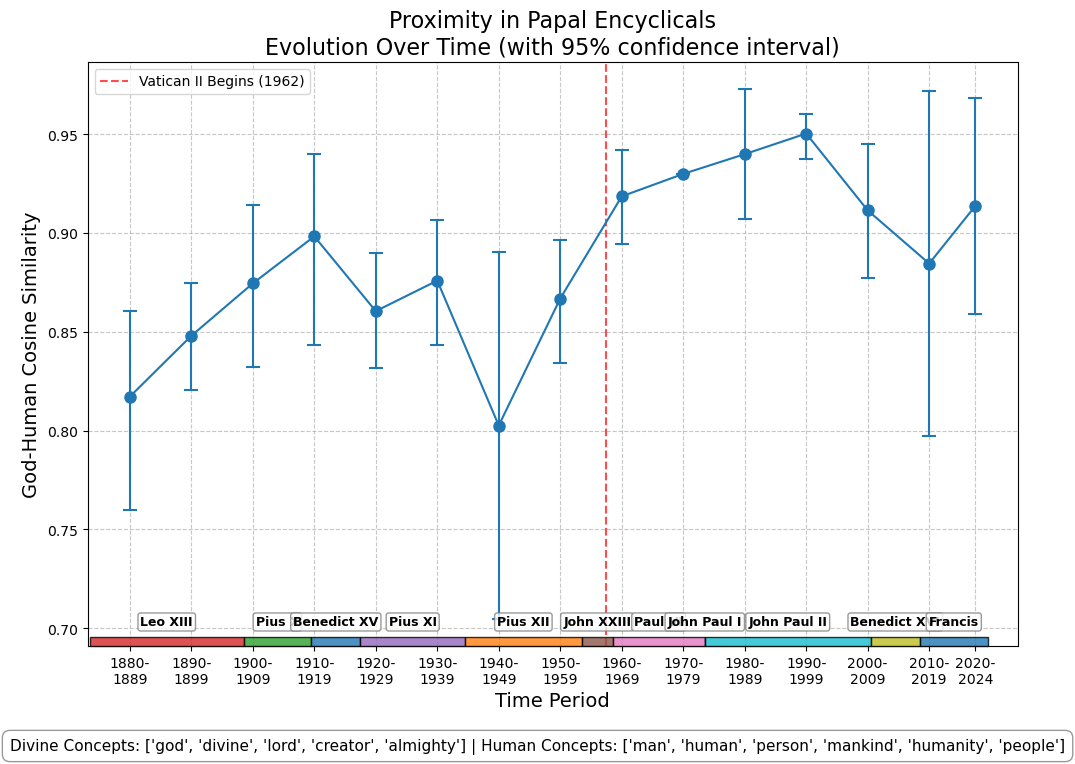

<Figure size 2000x800 with 0 Axes>

In [52]:
# Run the analysis with the updated approach
results, main_fig, _ = analyze_divine_human_proximity(
    df_Encyclicals,
    interval_years=10,
    min_docs=1,  # Reduced minimum requirement
    concepts1=["god", "divine", "lord", "creator", "almighty"],  # Your divine concepts
    concepts2=["man", "human", "person", "mankind", "humanity", "people"]    # Your human concepts
)
# Display the figure
plt.figure(figsize=(20, 8))
main_fig.show()

Analyzing with divine concepts: ['church', 'ecclesia', 'catholic', 'faith', 'religion']
Analyzing with human concepts: ['society', 'world', 'social', 'community', 'culture']

Summary of results:
    StartYear  EndYear  Proximity  NumDocs  ScoredDocs
0        1880     1889   0.788501       30          25
1        1890     1899   0.778199       41          38
2        1900     1909   0.821460       24          16
3        1910     1919   0.764178        9           7
4        1920     1929   0.854980       18          17
5        1930     1939   0.868203       16          15
6        1940     1949   0.863587       14          12
7        1950     1959   0.841186       28          27
8        1960     1969   0.845673       11          11
9        1970     1979   0.894162        1           1
10       1980     1989   0.904209        6           6
11       1990     1999   0.927336        6           6
12       2000     2009   0.894690        4           4
13       2010     2019   0.831148  

/var/folders/10/2lfzfs1j0j933_mjkrskp5kh0000gq/T/ipykernel_33571/3241304631.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  main_fig.show()


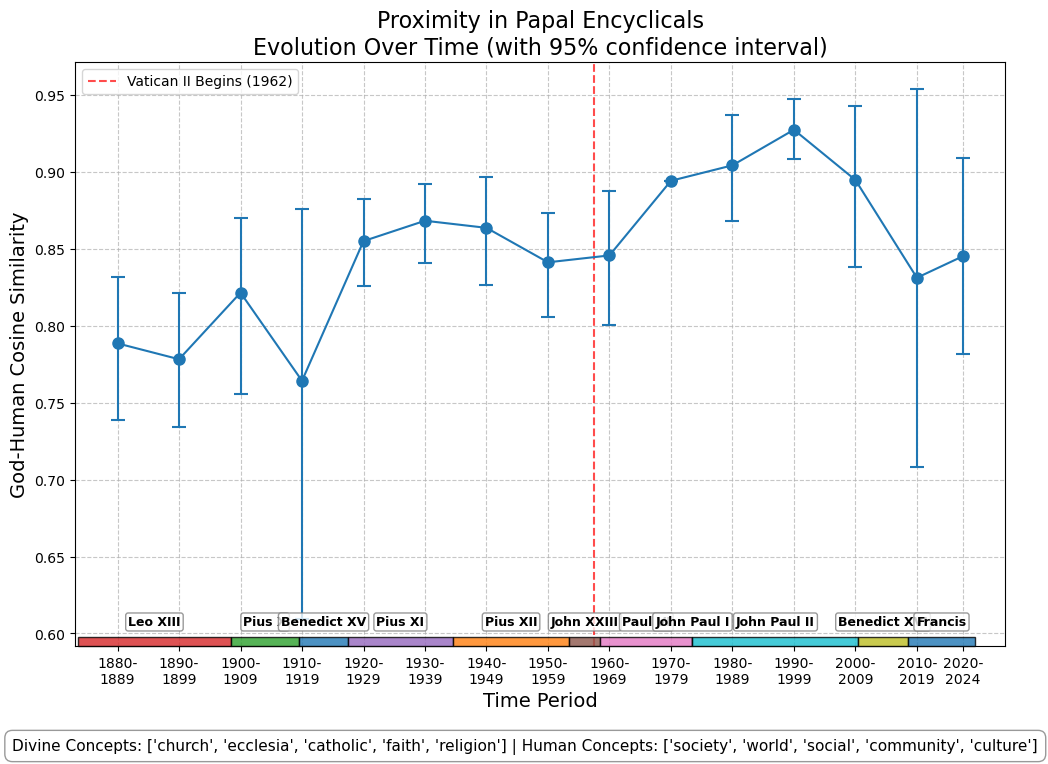

<Figure size 2000x800 with 0 Axes>

In [55]:
# Run the analysis with the updated approach
results, main_fig, _ = analyze_divine_human_proximity(
    df_Encyclicals,
    interval_years=10,
    min_docs=1,  # Reduced minimum requirement
    concepts1 = ["church", "ecclesia", "catholic", "faith", "religion"],  # Your divine concepts
    concepts2 = ["society", "world", "social", "community", "culture"]    # Your human concepts
)

# Display the figure
plt.figure(figsize=(20, 8))
main_fig.show()